## Slide 31 - Lecture 2

Q: Suppose that the data for analysis includes the attribute age. The age values for the data tuples are (in increasing order):  

13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70

1. Calculate the mean, median, and standard deviation of age.
2. What is the mode of the data? Comment on the data’s modality (i.e.,binomial,trinomial,etc.)?
3. What is the mid range of the data? 
4. Can you find Q1 and Q3?
5. Draw the boxplots for age.
6. Give the five-number-summary of the data. 
7. Normalise the variable age based on z-score normalisation.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci_stat 

plt.style.use('ggplot') 

In [26]:
data_set=[13
    ,  15
    ,  16
    ,  16
    ,  19
    ,  20
    ,  20
    ,  21
    ,  22
    ,  22
    ,  25
    ,  25
    ,  25
    ,  25
    ,  30
    ,  33
    ,  33
    ,  35
    ,  35
    ,  35
    ,  35
    ,  36
    ,  40
    ,  45
    ,  46
    ,  52
    ,  70]

age_df=pd.DataFrame(data_set)

---

1. Calculate the mean, median, and standard deviationof age.

In [3]:
question_one_string="""
The mean: {}
The median: {}
The standard deviation: {}
"""

print(question_one_string.format(np.mean(data_set),np.median(data_set),np.std(data_set)))


The mean: 29.962962962962962
The median: 25.0
The standard deviation: 12.700193878606099



---

2. What is the mode of the data? Comment on the data’s modality (i.e.,binomial,trinomial,etc.)?

In [8]:
question_two_string="""
What is the mode of the data? Answer: {} 
"""

print(question_two_string.format(sci_stat.mode(data_set,axis=0)[0]))

answer_two_part_two_string="""
The data’s modality is: {}
We see this in the graph:
"""
print(answer_two_part_two_string.format('Unimodal, skewed right'))
age_df.plot.hist(bins=8)


What is the mode of the data? Answer: ModeResult(mode=array([25]), count=array([4])) 



---
3. What is the mid range of the data? 
4. Can you find Q1 and Q3?

In [33]:
if len(age_df.describe().T)>1:
    raise ValueError("""There should be only a single row in age.""")

print("""
Q1: {}
Q3: {}
""".format(age_df.describe().T['25%'][0]
          ,age_df.describe().T['75%'][0]))



Q1: 20.5
Q3: 35.0



---
5. Draw the boxplots for age.

Draw the boxplots for age:


<AxesSubplot:>

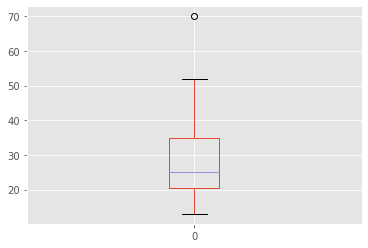

In [37]:
print('Draw the boxplots for age:')
age_df.plot.box()

---

6. Give the five-number-summary of the data. 

In [42]:
def five_number_summary(list_of_numbers=[1]):
    """A function to get five_number_summary as described in Lecture 2 Slide 21"""
    if type(list_of_numbers)!=list:
        raise ValueError("Needs to be a list")
    
    value_dict={
        'min':np.min(list_of_numbers)
        ,'Q1':pd.DataFrame(list_of_numbers).describe().T['25%'][0] 
        ,'median':np.median(list_of_numbers) 
        ,'Q3':pd.DataFrame(list_of_numbers).describe().T['75%'][0]
        ,'max':np.max(list_of_numbers)
        
    }
    
    print("""
min()={} 
Q1={} 
median={} 
Q3={} 
max()={}""".format(
        value_dict['min']
        ,value_dict['Q1']
        ,value_dict['median']
        ,value_dict['Q3']
        ,value_dict['max']
                    )
         )
    
    return value_dict

In [43]:
five_number_summary(list_of_numbers=data_set)


min()=13 
Q1=20.5 
median=25.0 
Q3=35.0 
max()=70


{'min': 13, 'Q1': 20.5, 'median': 25.0, 'Q3': 35.0, 'max': 70}

---

7. Normalise the variable age based on z-score normalisation.

In [48]:
def get_z_score_normalised_data(dataset=[1]):
    """
    A function to normalise data by z score - Assuming a single list
    """
    
    if type(dataset)!=list:
        raise ValueError("Should be list")
        
    for value in dataset:
        if type(value)!=float and type(value)!=int:
            raise ValueError("Should be list of value")

    mean_of_dataset=np.mean(dataset)
    std_of_dataset=np.std(dataset)
    
    new_dataset=[]
    
    for value in dataset:
        z_score=(value - mean_of_dataset)/std_of_dataset
        new_dataset+=[z_score]
        
    return new_dataset

normalised_data=get_z_score_normalised_data(dataset=data_set)

print("""
Normalise the variable age based on z-score normalisation:

Normalised Data Set:
{}
""".format(normalised_data))


Normalise the variable age based on z-score normalisation:

Normalised Data Set:
[-1.3356459850221374, -1.1781680741243308, -1.0994291186754275, -1.0994291186754275, -0.8632122523287176, -0.7844732968798143, -0.7844732968798143, -0.705734341430911, -0.6269953859820077, -0.6269953859820077, -0.39077851963529775, -0.39077851963529775, -0.39077851963529775, -0.39077851963529775, 0.0029162576092187234, 0.23913312395592862, 0.23913312395592862, 0.3966110348537352, 0.3966110348537352, 0.3966110348537352, 0.3966110348537352, 0.4753499903026385, 0.7903058120982517, 1.1840005893427683, 1.2627395447916716, 1.7351732774850914, 3.152474475565351]

